```
摘自簡報說明：
題目: 將Kaggle Dataset SMS文件以機器學習方式分辨是否為垃圾郵件
說明：輸入文件spam.csv是一個至少有兩欄v1和v2的csv檔，v1註明該簡訊是ham還是spam，v2是sms內容本身，
我們在讀入後先去掉不必要的欄位內容，將欄位名稱改為labels和data，再將labels內容改成0/1，0
代表ham1代表spam。接著將內容切割成訓練集和測試集，再用tokenizer做前處理，最後形成可以分析的格式。
建模分析之後我們印出訓練和測試準確度，然後以word cloud畫出spam和ham常用的字，
再分別印出判斷錯誤的SMS供未來改進。
延伸:可用不同的tokenizer，不同的ML分類器做改進準確率的比較。
範例程式檔名: spam_sms_垃圾簡訊偵測器.py，以Naïve Bayes (MultinomialNB) 方式完成
模組: sklearn, pandas, numpy, wordcloud
輸入檔：spam.csv
成績：辨識百分率
進一步說明：
在這個習題中，我們從Kaggle下載SMS簡訊資料，經由前處理之後判斷是否為SPAM
並畫出垃圾字雲來

以下是本習題要做的

1.前處理：
 刪除不必要的欄位
 重新命名欄位
 二元數位化標記(labels)
 分為訓練與測試組

2.特徵：可選用 Count or TF-IDF
3.建模，訓練，印出
4.列出判斷錯的 
```

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [2]:

# 資料來自：
# https://www.kaggle.com/uciml/sms-spam-collection-dataset

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# 刪除不必要的欄位
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# 重新命名欄位
df.columns = ['labels', 'data']

# 二元數位化標記(labels)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [3]:
# 分為訓練與測試組
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [4]:
# 方法1:以TF-IDF 為特徵
tfidf = TfidfVectorizer(decode_error='ignore', stop_words='english', max_features=1500)
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

# # 方法2:以數量為特徵
# count_vectorizer = CountVectorizer(decode_error='ignore', stop_words='english', max_features=1500)
# Xtrain = count_vectorizer.fit_transform(df_train)
# Xtest = count_vectorizer.transform(df_test)

In [5]:
np.unique(Ytrain, return_counts=True)

(array([0, 1], dtype=int64), array([3208,  525], dtype=int64))

In [6]:
# 產生模型，訓練，印出
# model = MultinomialNB()
model = SVC(C=100, gamma=1, class_weight={1: 6})
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.998660594695955
test score: 0.988036976617727


In [7]:
# 以wordcloud visualize 數據
def visualize(label):
    words = ' '.join(df[df['labels'] == 'spam']['data'])
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

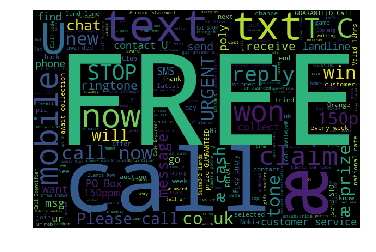

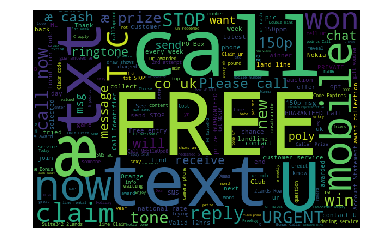

In [8]:
visualize('spam')
visualize('ham')

In [9]:
# 找出判斷錯誤的地方
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

You will recieve your tone within the next 24hrs. For Terms and conditions please see Channel U Teletext Pg 750
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+
88066 FROM 88066 LOST 3POUND HELP
<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches
<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 40 matches. Please call back on 09056242159 to retrieve your messages and matches cc100p/min
Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?
ROMCAPspam Everyone around should be respo

In [10]:
# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)

I accidentally deleted the message. Resend please.
See the forwarding message for proof
Cheers for the message Zogtorius. Iæ§¢ve been staring at my phone for an age deciding whether to text or not.
No message..no responce..what happend?
No message..no responce..what happend?
No message..no responce..what happend?
Noice. Text me when you're here
